In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Introdução
O método de Monte Carlo é um modelo estatístico que faz uso da lei dos grandes números para - no caso estudado durante essa tarefa - cálculo de integrais através da projeção de pontos aleatórios no domínio desejado. São apresentados dois modos, cada uma se utilizando dos pontos de uma maneira particular apresentada em seguida:

In [22]:
def tarefa_max_point(num_points, function, a1=0, a2=1):
    points = []
    for _ in range(num_points):
        num = np.random.uniform(a1, a2)
        points.append(function(num))
    return max(points)

Um requisito do método um é saber o maior valor de F(x) para a função de origem no intervalo dado. Dessa forma, definimos tarefa_max_point para encontrar esse número a partir de N amostras pertencentes ao domínio da função.

In [23]:
def mc_1(n_points, function, y_max, a1=0, a2=1):    
    hits = 0

    shots_x = np.random.uniform(a1, a2, n_points)
    shots_y = np.random.uniform(0, y_max, n_points)
    shots = list(zip(shots_x, shots_y))
    
    for x, y in shots:
        if y < function(x):
            hits += 1
            
    return (hits / n_points) * y_max * (a2-a1)


No desenvolvimento do método um, usamos um gerador de números aleatórios divididos uniformemente dentro dos intervalos definidos. Para o eixo X utilizamos os limites da integral e para Y, o valor máximo de F(x). Para cada valor de N o valor da função em X é calculado, se Y for menor que F(x) então o ponto atirado está dentro do contradomínio da função e é representado pelo incremento no contador (counter) da função. Dessa forma basta calcular o resultado da integral como está descrito no retorno de method1.

In [24]:
def mc_2(n_points, function, a1=0, a2=1):
    function_values_sum = 0
    values = np.random.uniform(a1, a2, n_points)  # random values of x generated in the function's domain
    for i in range(n_points):
        function_values_sum += function(values[i])
    
    integral = (a2 - a1) / n_points * function_values_sum
    return integral

No método dois, de mesmo modo, usamos um gerador de números aleatórios divididos uniformemente dentro do intervalo definido pelos limites da integral. Para cada valor aleatório gerado será computado o resultado da função e a média destes multiplicados pelo intervalo dos limites definidos é aproximadamente o resultado da integral.

In [25]:
def plot_hists(function, N_amos=1000, Ns=[100,1000,10000], min=0, max=1, iter=10000, method=mc_1):
  ests_list = [[] for _ in range(len(Ns))]
  for i in range(len(Ns)):
    for _ in range(N_amos):
      if method == mc_1:
        result = method(Ns[i], function, tarefa_max_point(Ns[i], function, min, max), min, max)
      else:
        result = method(Ns[i], function, min, max)

      ests_list[i].append(result)
  
  for ests in ests_list:
    plt.hist(ests)

  plt.show()

  return ests_list

plot_hists é utilizada na plotagem dos histogramas referentes aos valores das integrais encontrados com os números distintos de pontos (100, 1000, 10000) atirados no domínio desejado da função.

In [26]:
def plot_errors(ests_list, iter_list=['100','1000','10000'], N = 1000):
  std_errors = []
  for ests in ests_list:
    std_errors.append(np.std(ests) / (math.sqrt(N)))

  if len(iter_list) <= 1:
    return std_errors

  plt.bar(x=iter_list, height=std_errors)

plot_errors define um método para cálculo de erro do valor da integral obtida.

### Comentários Gerais
Foram realizados casos de teste para 3 funções diferentes. Em todos eles, plotamos histogramas que dizem respeito aos valores encontrados para a integral desejada, com 1000 amostras, sendo que geramos com 100, 1000 e 10000 pontos atirados no domínio de cada função. Também exibimos gráficos com os valores de erro partindo do mesmo princípio.

Dentre os histogramas gerados abaixo, podemos extrair uma série de informações gerais, as quais se aplicam a todos os casos.
As cores do gráfico dizem respeito, respectivamente, a valores encontrados para a integral a partir de:

- 100 pontos aleatórios - azul
- 1000 pontos - laranja
- 10000 pontos - verde

Como podemos observar, o número de pontos é inversamente proporcional a dispersão do histograma referente aos valores obtidos para a integral, indicando que o método de Monte Carlo é mais preciso quando se utiliza uma quantidade elevada de amostras. O mesmo é mostrado pelo gráfico de erro. É notável que este diminui a medida que o número de pontos projetados cresce.


# Tarefa

### Função 1
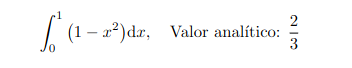

In [27]:
def fun_1(x):
    return 1 - x**2

Cálculo da integral por método 1: 
 100 pontos: 0.6799999997616866,
 1.000 pontos: 0.6699999997651912,
 10.000 pontos: 0.6605999997684854


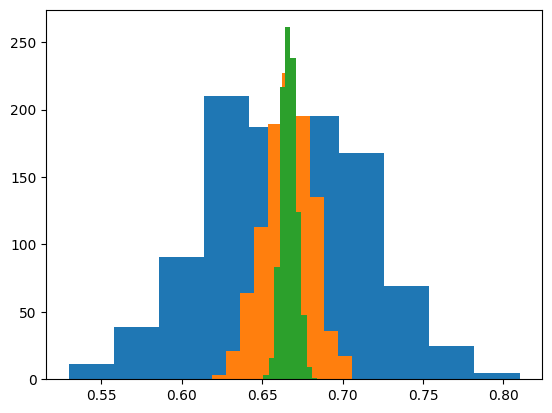

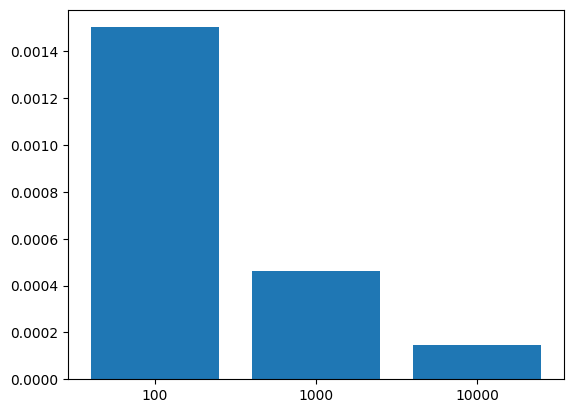

In [42]:
y_max = tarefa_max_point(10000, fun_1)

print(f"Cálculo da integral por método 1: \n 100 pontos: {mc_1(100, fun_1, y_max)},\n 1.000 pontos: {mc_1(1000, fun_1, y_max)},\n 10.000 pontos: {mc_1(10000, fun_1, y_max)}")
ests = plot_hists(fun_1)
plot_errors(ests)

Cálculo da integral por método 2: 
 100 pontos: 0.6706500140889183,
 1.000 pontos: 0.6792403083626737,
 10.000 pontos: 0.6672967046728427


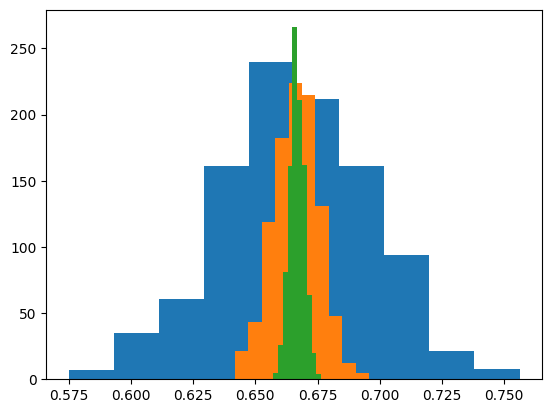

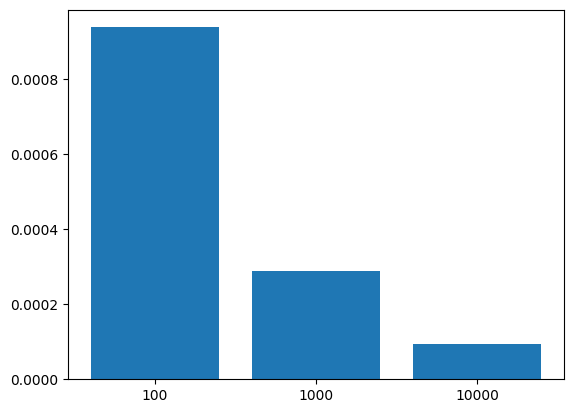

In [38]:
print(f"Cálculo da integral por método 2: \n 100 pontos: {mc_2(100, fun_1)},\n 1.000 pontos: {mc_2(1000, fun_1)},\n 10.000 pontos: {mc_2(10000, fun_1)}")
ests = plot_hists(fun_1, method=mc_2)
plot_errors(ests)

### Função 2

In [30]:
def fun_2(x):
    return np.exp(x)

Cálculo da integral por método 1: 
 100 pontos: 1.7123148228582357,
 1.000 pontos: 1.7286225830759332,
 10.000 pontos: 1.7074224947929264


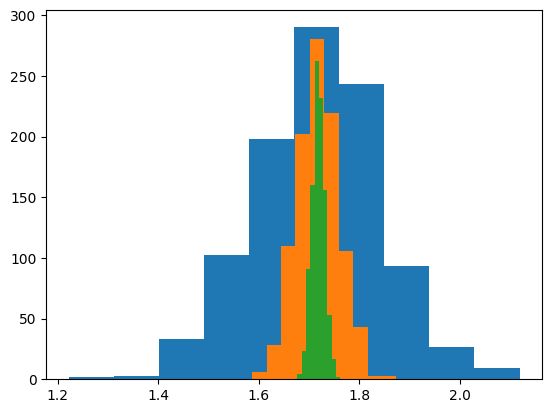

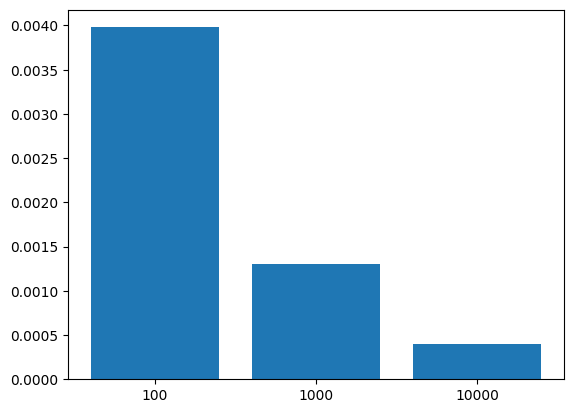

In [44]:
y_max = tarefa_max_point(10000, fun_2)

print(f"Cálculo da integral por método 1: \n 100 pontos: {mc_1(100, fun_2, y_max)},\n 1.000 pontos: {mc_1(1000, fun_2, y_max)},\n 10.000 pontos: {mc_1(10000, fun_2, y_max)}")
ests = plot_hists(fun_2)
plot_errors(ests)

Cálculo da integral por método 2: 
 100 pontos: 1.642668567065383,
 1.000 pontos: 1.7323719598329808,
 10.000 pontos: 1.7136342317407767


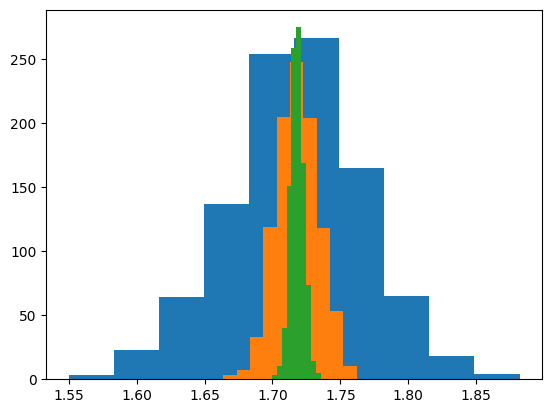

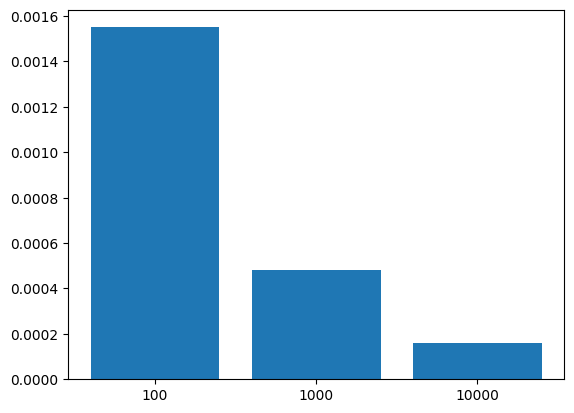

In [39]:
print(f"Cálculo da integral por método 2: \n 100 pontos: {mc_2(100, fun_2)},\n 1.000 pontos: {mc_2(1000, fun_2)},\n 10.000 pontos: {mc_2(10000, fun_2)}")
ests = plot_hists(fun_2, method=mc_2)
plot_errors(ests)

### Função 3


In [33]:
def fun_3(x):
    return np.sin(x) ** 2

Cálculo da integral por método 1: 
 100 pontos: 1.6022122446963043,
 1.000 pontos: 1.495398095049884,
 10.000 pontos: 1.5682830442203823


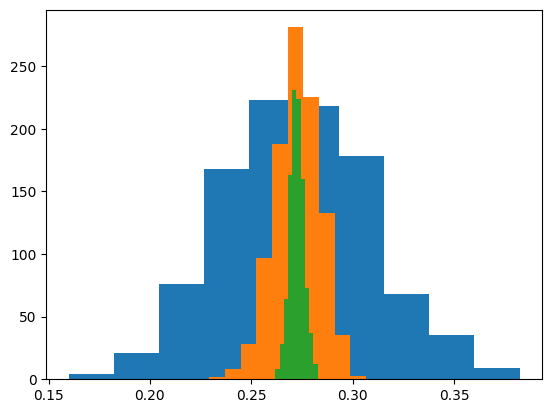

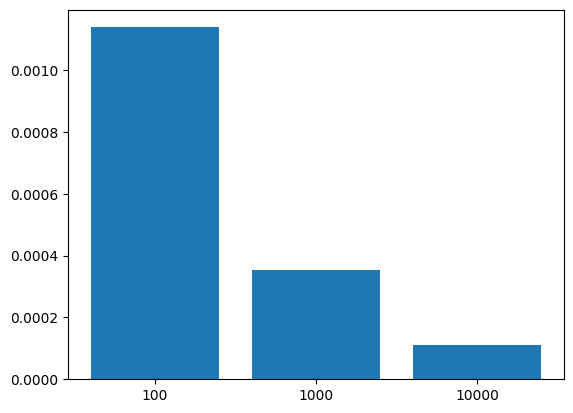

In [45]:
y_max = tarefa_max_point(10000, fun_3, a2=np.pi)

print(f"Cálculo da integral por método 1: \n 100 pontos: {mc_1(100, fun_3, y_max, a2=np.pi)},\n 1.000 pontos: {mc_1(1000, fun_3, y_max, a2=np.pi)},\n 10.000 pontos: {mc_1(10000, fun_3, y_max, a2=np.pi)}")
ests = plot_hists(fun_3)
plot_errors(ests)

Cálculo da integral por método 2: 
 100 pontos: 1.483320966554621,
 1.000 pontos: 1.5607663804373113,
 10.000 pontos: 1.58901964699118


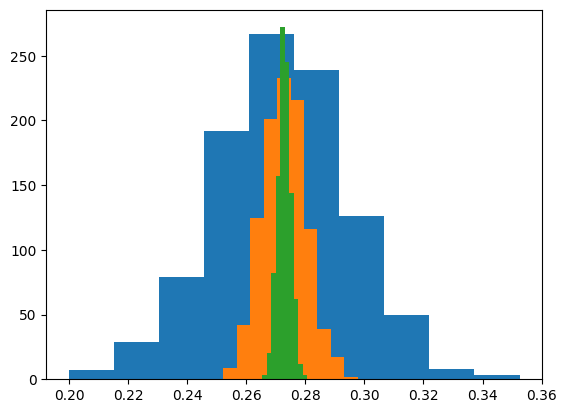

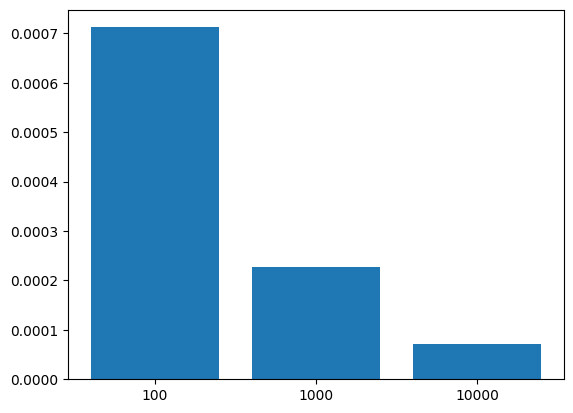

In [41]:
print(f"Cálculo da integral por método 2: \n 100 pontos: {mc_2(100, fun_3, a2=np.pi)},\n 1.000 pontos: {mc_2(1000, fun_3, a2=np.pi)},\n 10.000 pontos: {mc_2(10000, fun_3, a2=np.pi)}")
ests = plot_hists(fun_3, method=mc_2)
plot_errors(ests)

### Conclusões - Comparação de métodos
Após analisar as 3 primeiras funções podemos observar que o método 2 funciona mais precisamente, retornando um intervalo menor de valores da integral para um número igual de pontos aleatórios atirados no gráfico da função. Além disso, observando os histogramas de erros, é possível ver que estes atingem valores inferiores aos observados no método 1.

### Função 4
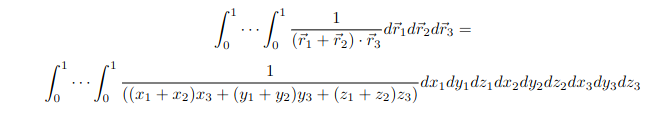

Aqui temos um caso diferente dos observados anteriormente. O método de Monte Carlo estudado tem seu real poder fundado no fato de que fornece resultados precisos a um custo computacional muito menor que outras formas de obter integrais quando se tem mais dimensões na função.